In [160]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

### Read the dataset

In [161]:
#Reading the csv file
df = pd.read_csv("jivani_pp.csv")
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [162]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,38.981559,0.487846,29.998529,1.085499,0.115675,1.493713,9942.269682
std,14.063482,0.500062,5.866873,1.216249,0.319969,1.110582,7251.326564
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,25.800000,0.000000,0.000000,1.000000,4415.158800
50%,39.000000,0.000000,29.735000,1.000000,0.000000,1.000000,8410.046850
75%,51.000000,1.000000,33.770000,2.000000,0.000000,2.000000,12979.358000
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,34472.841000


# Multiple Linear Regression - Machine Learning Model

In [163]:
reg = linear_model.LinearRegression()

X = df.drop(columns = ['charges','sex','children','region'], axis = 1)
y = df['charges']

### Splitting the dataset into Training and Test set

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

### Now, we fit the linear regression to Training set

In [165]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
predict_lreg = lr.fit(X_train,y_train)

### Intercept and Slope forms

In [166]:
#To retrieve the intercept:
print('Intercept:', lr.intercept_)

#For retrieving the slope:
print('Slope:', lr.coef_)

Intercept: -2792.3363496225866
Slope: [  242.23629723    56.40429416 14730.00560893]


### Next, we predict the Test set results

In [167]:
y_pred = lr.predict(X_test)

### Evaluation Metrics - ***Note: Since this is a regression problem, we can NOT measure the confusion matrix. Instead, we will use other performace metrics

In [168]:
#Calculate the Residuals/Errors
from sklearn import metrics
from sklearn import model_selection

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('Test R-Squared/Score:', metrics.r2_score(y_test,y_pred))
lr_score2 = lr.score(X_train,y_train)
# R-squared of the train
print('Train R-Squared/Score:', lr_score2)

MAE: 2335.9587408899347
MSE: 15065547.101000844
RMSE: 48.331757063962975
Test R-Squared/Score: 0.6424574261014897
Train R-Squared/Score: 0.5830705751549957


#### Our testing accuracy is about 64.2%. It is kind of low, but given the information we had in our dataset, we could do minimal to get better results. I tried various trial and error on adding and removing columns to the machine learning models, but it kept giving me low possible scores. The highest scores were seen on age, bmi, and smoker. If we compare the features I used with the correlation heatmap, we can see that the red hot zones are in these features. This suggested that there is major correlation in this features and we need to train and test on this features. 

#### The MAE (mean absolute error) is derived from 1 divided by the total number of data points then multiplying with the sum of absolute value of actual minus predicted results. In this case, the MAE represents from a single data point to the linear regression line (prediction). MAE here is little bit higher and this means that the model is not trained perfectly. Its not 100% predicting the charges based on the given features.

#### However, for MSE (mean squared error) the error mostly pertains to the outliers of our model. The further the data points in the model, the higher our MSE will be. In our case, we have about 16 points that can be considered outliers. 

#### RMSE is the square root of the mean squared error (MSE). We can interpret RMSE and MAE based on how they are spreaded apart. In our case, RMSE indicates that the model had charges missed by 48%.

### Here, the insurance companies will use the predict function to predict charges for the patients using age, bmi, children, smoker, and region.

In [169]:
print(df.loc[[0]])
#age,bmi,smoker
lr.predict([[19,27.9,1]])

   age  sex   bmi  children  smoker  region    charges
0   19    0  27.9         0       1       3  16884.924


array([18113.83871377])

#### If you look at the above senerio, we have a person who is 19 years old, has bmi of 27.9, and they smoke. According to the model, the model predicts they should be charged estimated of 18,113(USD) because the person is young, have moderate bmi, and has smoking history. Now, if we say they did not smoke, then the difference is big, estimated about 3,383(USD). Here, we found out that smoking is a major factor insurance companies consider. Even if we had increased the person's BMI to obesity, it still would not make big difference as it did with smoking. 

### Convert test, prediction, and difference of test and pred to DataFrame

In [170]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': (y_test-y_pred)})
df1
myReal = X_test.join(df1)

### We will visualize the results

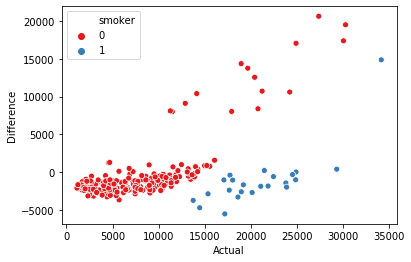

In [171]:
sns.scatterplot(x=myReal['Actual'],y=myReal['Difference'],data=myReal, palette="Set1",hue='smoker')

#### From this plot, we can discuss that those who do not smoke saw few difference in terms of charge than those who did smoke. However, based on the model, the prediction charges for this people are less. From the below chart, we can see that most of them have high BMI level and the age seems to be higher. 

In [172]:
myReal[myReal['Difference']>= 5000].head()

,age,bmi,smoker,Actual,Predicted,Difference
338,50,25.365,0,30284.64294,10750.173433,19534.469507
985,37,29.800,0,20420.60465,7851.254614,12569.350036
1122,55,37.715,0,30063.58055,12657.947952,17405.632598
898,48,29.600,0,21232.18226,10504.573024,10727.609236
998,23,31.400,1,34166.27300,19280.198932,14886.074068


In [173]:
myReal[myReal['Difference']>= 5000].describe()

,age,bmi,smoker,Actual,Predicted,Difference
count,16.000000,16.000000,16.0000,16.000000,16.000000,16.000000
mean,35.250000,32.632813,0.0625,21237.686344,8507.749234,12729.937111
std,14.825653,5.413906,0.2500,6933.672312,4552.835966,4244.385310
min,18.000000,22.420000,0.0000,11272.331390,3164.722568,8003.740363
25%,21.750000,29.277500,0.0000,16980.236965,4377.465246,8933.229236
50%,34.500000,32.395000,0.0000,20601.046785,7842.955127,11648.479636
75%,48.500000,37.810000,0.0000,25530.260890,11160.630501,15434.653206
max,58.000000,41.910000,1.0000,34166.273000,19280.198932,20667.622749


#### For those 16 people who were overcharged (>= 5000(USD)) had mean difference of around 12,730(USD), have mean age of 35, and have high BMI or obesity of 32.6. These people do not smoke, so it means that other health contribution such as they are not doing regular exercise or they just have unhealth lifestyles. 

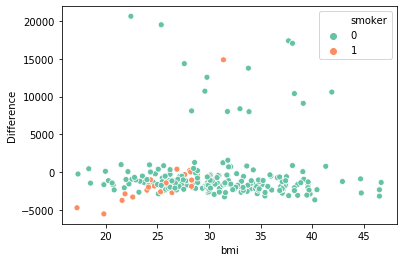

In [174]:
sns.scatterplot(x=myReal['bmi'],y=myReal['Difference'],data=myReal, palette="Set2",hue='smoker')

#### This chart shows the relationship between bmi and difference of actual and predicted charges. We see higher differences for the people who have above normal BMI level.

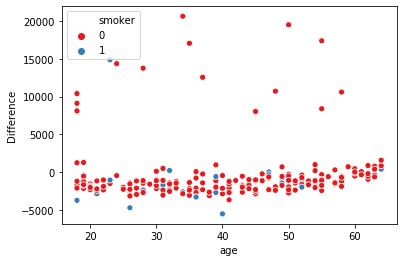

In [175]:
sns.scatterplot(x=myReal['age'],y=myReal['Difference'],data=myReal, palette="Set1",hue='smoker')

#### From the above chart, we compare the age and the difference of charges. We can see that most people were charged correctly and most were undercharged.

In [176]:
myReal[myReal['Difference']<= -5000].head()

,age,bmi,smoker,Actual,Predicted,Difference
233,40,19.8,1,17179.522,22743.926173,-5564.404173


In [177]:
myReal[myReal['Difference']<= -5000].describe()

,age,bmi,smoker,Actual,Predicted,Difference
count,1.0,1.0,1.0,1.000,1.000000,1.000000
mean,40.0,19.8,1.0,17179.522,22743.926173,-5564.404173
std,NaN,NaN,NaN,NaN,NaN,NaN
min,40.0,19.8,1.0,17179.522,22743.926173,-5564.404173
25%,40.0,19.8,1.0,17179.522,22743.926173,-5564.404173
50%,40.0,19.8,1.0,17179.522,22743.926173,-5564.404173
75%,40.0,19.8,1.0,17179.522,22743.926173,-5564.404173
max,40.0,19.8,1.0,17179.522,22743.926173,-5564.404173


#### About 1 person who was charged below 5000(USD) had a age of 40, BMI of 19.8 (considered normal), but was approximately undercharged by 5,564(USD). 

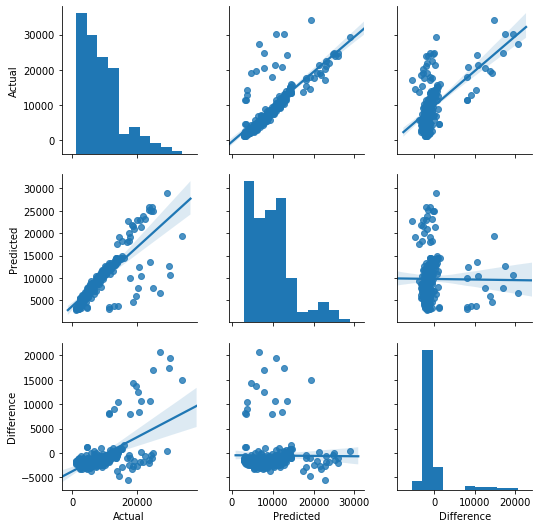

In [178]:
sns.pairplot(df1,kind='reg')

#### From the pairplot, we see the linear relationship between actual and predicted results. Those points that are within or near the line have little to no difference. While the points that are left of the line overcharged while the right of the lines are undercharged.

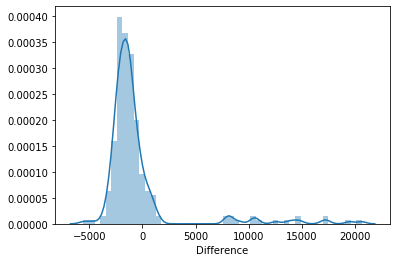

In [179]:
sns.distplot(df1['Difference'])

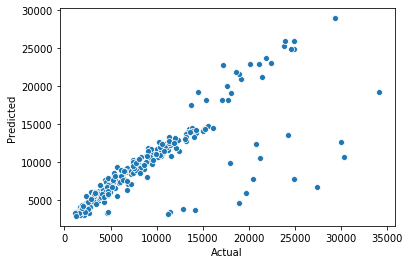

In [180]:
sns.scatterplot(x=df1['Actual'],y=df1['Predicted'],data=df1)

In [181]:
df2 = pd.DataFrame(df1['Predicted'])
df2['Actual'] = pd.DataFrame(df1['Actual'])
df2['Difference'] = pd.DataFrame(df1['Difference'])

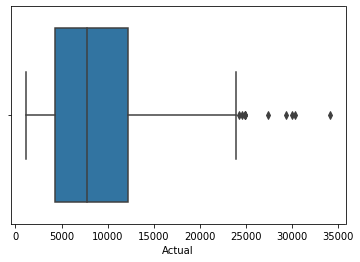

In [182]:
sns.boxplot(df2['Actual'])

In [183]:
df2['Actual'].describe()

count      239.000000
mean      9254.477322
std       6504.876336
min       1131.506600
25%       4248.935275
50%       7749.156400
75%      12159.774750
max      34166.273000
Name: Actual, dtype: float64

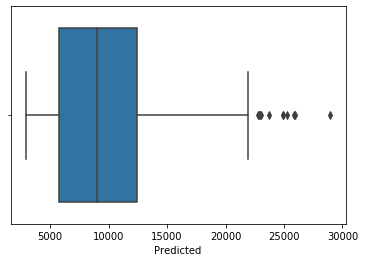

In [184]:
sns.boxplot(df2['Predicted'])

In [185]:
df2['Predicted'].describe()

count      239.000000
mean      9773.998159
std       5276.245133
min       2926.958322
25%       5739.336842
50%       9038.444129
75%      12385.656222
max      28957.221730
Name: Predicted, dtype: float64

#### From the above two boxplots, we see that there are outliers/points beyond the maximum predicted or actual charges. Those are serious points that should be investigated because as an auditors we want to be fair for both sides (consumers/insurance providers). We need more information for these specific people and need description of kind of treatments they did in the past and their health information.

# Decision Tree Regression - Machine Learning Model

In [186]:
#We will use decision tree regressor for our dataset, so we will import necessary modules
from sklearn.tree import DecisionTreeRegressor

### Splitting the dataset into Training and Test set

In [187]:
rg = DecisionTreeRegressor(random_state=0)

from sklearn.model_selection import train_test_split
X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(X,y,test_size=0.20,random_state=0)

### Now, we fit the Decision Tree Regression to Training set

In [188]:
rg.fit(X_train_rg,y_train_rg)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

### Now, we will try to preduct charges by feeding input variables

In [189]:
y_pred_rg = rg.predict(X_test_rg)

### Evaluation Metrics - ***Note: Since this is a Decision Tree Regression problem, we can NOT measure the confusion matrix. Instead, we will use other performace metrics

In [190]:
#Calculate the Residuals/Errors
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test_rg,y_pred_rg))
print('MSE:', metrics.mean_squared_error(y_test_rg,y_pred_rg))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test_rg,y_pred_rg)))
print('Test R-Squared/Score:', metrics.r2_score(y_test_rg,y_pred_rg))
rg_score = rg.score(X_train_rg,y_train_rg)
# R-squared of the train
print('Train R-Squared/Score:', rg_score)

MAE: 3597.046828012553
MSE: 42986093.034901835
RMSE: 59.9753851843617
Test R-Squared/Score: -0.02016596161440476
Train R-Squared/Score: 0.9900214675394683


#### Our testing accuracy is about negative 2.01%. It is considered that the testing dataset did not work well with the traning dataset. If its closer to zero percentage, means that testing did not react to the traning set. However, the training dataset score did very well with the results of 99.0%. I tried various trial and error on adding and removing columns to the machine learning models, but it kept giving me lower high possible scores.

#### The MAE (mean absolute error) is derived from 1 divided by the total number of data points then multiplying with the sum of absolute value of actual minus predicted results. In this case, the MAE is 3597 and MAE on the linear regression was 2335. As an analyst, we can represent that Decission Tree is not good to use since the results were not correctly tested on tranining model. We have to look at other features of the testing dataset that were giving bad results.

#### However, for MSE (mean squared error) the error mostly pertains to the outliers of our model. The further the data points in the model, the higher our MSE will be. In our case, we have about 30+ points that can be considered outliers. 

#### RMSE is the square root of the mean squared error (MSE). We can interpret RMSE and MAE based on how they are spreaded apart. In our case, RMSE indicates that the model had charges missed by 59.9%.

### Here, the insurance companies will use the predict function to predict charges for the patients using age, bmi, children, smoker, and region.

In [191]:
#print(df.loc[[0]])
#age,bmi,smoker
#rg.predict([[19,27.9,0]])
print(df.loc[[1]])
#age,bmi,smoker
rg.predict([[18,33.77,1]])

   age  sex    bmi  children  smoker  region    charges
1   18    1  33.77         1       0       2  1725.5523


array([34439.8559])

#### If you look at the above senerio, we have a person who is 18 years old, has bmi of 33.77, and they do not smoke. According to the model, the model predicts they should be charged estimated of 1,136.4(USD) because given the condition that their BMI is too high and chances of incuring future treatments are high. Now, if we say they did smoke, then the difference is big, estimated about 32,714(USD). Because if smililar person who is 18, high BMI, and smokes are considered at risk and payment increases. Here, we found out that smoking and BMI is a major factors insurance companies consider.

### Convert test, prediction, and difference of test and pred to DataFrame

In [192]:
df3 = pd.DataFrame({'Actual': y_test_rg, 'Predicted': y_pred_rg, 'Difference': (y_test_rg-y_pred_rg)})
myReal2 = X_test_rg.join(df3)
df3.head()

,Actual,Predicted,Difference
247,4237.12655,3554.2030,682.92355
302,5478.03680,5272.1758,205.86100
406,10381.47870,8125.7845,2255.69420
874,4889.03680,5272.1758,-383.13900
877,19199.94400,17496.3060,1703.63800


### We will visualize the results

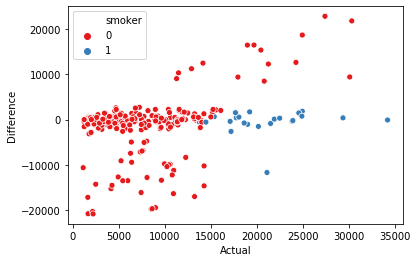

In [193]:
sns.scatterplot(x=myReal2['Actual'],y=myReal2['Difference'],data=myReal2, palette="Set1",hue='smoker')

#### From this plot, we can discuss that those who do smoke saw few difference in terms of charge than those who did not smoke. However, those who do not smoke, saw major changes to their prediction charges. People who do not smoke had fewer difference in their charges. We can see about 15 people were overcharged and about 30+ people were undercharged. From the below chart, we can see the differences in their lifestyle characteristics.

In [194]:
myReal2[myReal2['Difference']>= 5000].head()

,age,bmi,smoker,Actual,Predicted,Difference
338,50,25.365,0,30284.64294,8442.66700,21841.97594
985,37,29.800,0,20420.60465,5028.14660,15392.45805
1122,55,37.715,0,30063.58055,20630.28351,9433.29704
898,48,29.600,0,21232.18226,8930.93455,12301.24771
567,35,38.095,0,24915.04626,6196.44800,18718.59826


In [195]:
myReal2[myReal2['Difference']>= 5000].describe()

,age,bmi,smoker,Actual,Predicted,Difference
count,15.000000,15.000000,15.0,15.000000,15.000000,15.000000
mean,36.066667,32.715000,0.0,20375.780567,6554.864604,13820.915963
std,14.968857,5.593584,0.0,6226.932285,5349.082058,4633.621341
min,18.000000,22.420000,0.0,11272.331390,1137.011000,8512.856670
25%,21.000000,28.955000,0.0,16031.170560,2332.724825,9889.460445
50%,35.000000,33.000000,0.0,20420.604650,5028.146600,12501.369450
75%,49.000000,37.905000,0.0,24571.191750,8725.480275,16495.959550
max,58.000000,41.910000,0.0,30284.642940,20630.283510,22875.565530


#### For those 15 people who were overcharged (>= 5000(USD)) had mean difference of around 13,821(USD), have mean age of 36, and have high BMI or obesity of 32.7. These people do not smoke, so it means that other health contribution such as they are not doing regular exercise or they just have unhealth lifestyles. 

In [196]:
myReal2[myReal2['Difference']<= -5000].head()

,age,bmi,smoker,Actual,Predicted,Difference
952,48,37.290,0,8978.18510,28468.91901,-19490.73391
303,19,27.835,0,1635.73365,18838.70366,-17202.97001
249,52,31.200,0,9625.92000,23045.56616,-13419.64616
440,31,23.600,0,4931.64700,17626.23951,-12694.59251
581,53,39.600,0,10579.71100,20462.99766,-9883.28666


In [197]:
myReal2[myReal2['Difference']<= -5000].describe()

,age,bmi,smoker,Actual,Predicted,Difference
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,41.694444,30.595556,0.027778,7898.500406,20932.629796,-13034.129390
std,13.166667,5.031864,0.166667,4258.037503,5296.632435,4424.114461
min,18.000000,21.780000,0.000000,1131.506600,11774.159275,-20875.257880
25%,30.750000,27.035000,0.000000,5163.485500,17418.782618,-16206.841850
50%,44.000000,30.220000,0.000000,7681.927500,20546.640585,-12755.306470
75%,52.250000,33.522500,0.000000,10482.841750,23202.970542,-9860.380440
max,63.000000,39.600000,1.000000,21082.160000,32787.458590,-5056.872620


#### For those 36 people who were undercharged (<= -5000(USD)) had mean difference of around -13,034(USD), have mean age of 41, and have high BMI or obesity of 30.6. Of those 36 people, most of these people do not smoke, only one person who smokes is undercharged is 39 year old and has BMI of 28.3.

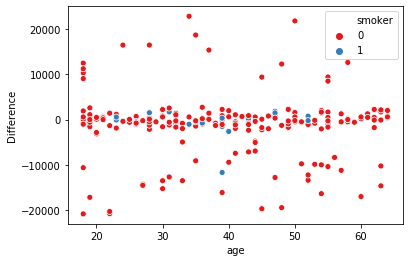

In [198]:
sns.scatterplot(x=myReal2['age'],y=myReal2['Difference'],data=myReal2, palette="Set1",hue='smoker')

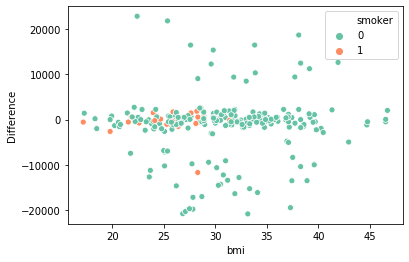

In [199]:
sns.scatterplot(x=myReal2['bmi'],y=myReal2['Difference'],data=myReal2, palette="Set2",hue='smoker')

#### This chart shows the relationship between bmi and difference of actual and predicted charges. We see major differences for the people who have above normal BMI level, and minor difference for normal bmi level that are either overcharged or undercharged.

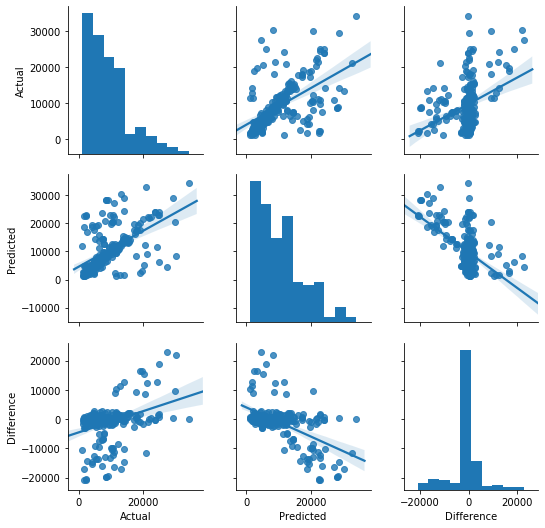

In [200]:
sns.pairplot(df3,kind='reg')

In [201]:
df3.describe()

,Actual,Predicted,Difference
count,239.000000,239.000000,239.000000
mean,9254.477322,10446.242470,-1191.765148
std,6504.876336,7309.281511,6460.683790
min,1131.506600,1136.399400,-20875.257880
25%,4248.935275,4559.209575,-1383.755000
50%,7749.156400,8930.934550,-300.660250
75%,12159.774750,14043.476700,592.041700
max,34166.273000,34254.053350,22875.565530


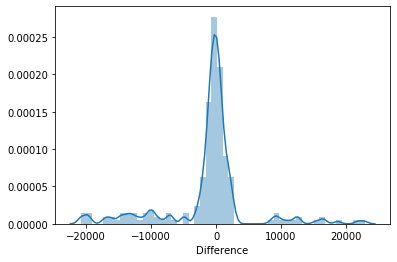

In [202]:
sns.distplot(df3['Difference'])

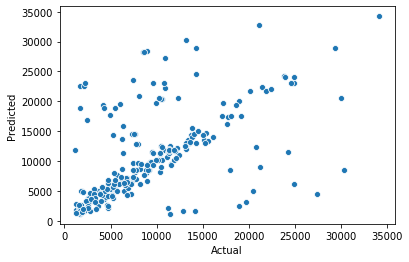

In [203]:
sns.scatterplot(x=df3['Actual'],y=df3['Predicted'],data=df3)

#### We can see a trend where mojority of the data points were accurately mapped with the prediction. However, we have data points where its to the left and right of the trend.

In [204]:
df4 = pd.DataFrame(df3['Predicted'])
df4['Actual'] = pd.DataFrame(df3['Actual'])
df4['Difference'] = pd.DataFrame(df3['Difference'])

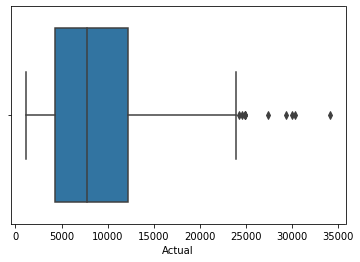

In [205]:
sns.boxplot(df4['Actual'])

In [206]:
df4['Actual'].describe()

count      239.000000
mean      9254.477322
std       6504.876336
min       1131.506600
25%       4248.935275
50%       7749.156400
75%      12159.774750
max      34166.273000
Name: Actual, dtype: float64

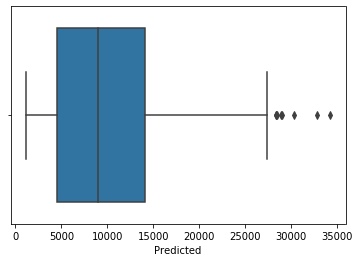

In [207]:
sns.boxplot(df4['Predicted'])

In [208]:
df4['Predicted'].describe()

count      239.000000
mean     10446.242470
std       7309.281511
min       1136.399400
25%       4559.209575
50%       8930.934550
75%      14043.476700
max      34254.053350
Name: Predicted, dtype: float64

#### The difference between predicted mean of Decision Tree Regression and Linear Regression was (10,446 - 9,773 = 673). So far the difference is not that major. We will compare all three models and pick the best model that has shows best statistics. From the above two boxplots, we see that there are outliers/points beyond the maximum predicted or actual charges. Those are serious points that should be investigated because as an auditors we want to be fair for both sides (consumers/insurance providers). We need more information for these specific people and need description of kind of treatments they did in the past and their health information in order to predict charges better.

# K-Neighbors Regression - Machine Learning Model

### Splitting the dataset into Training and Test set

In [209]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train_kn, X_test_kn, y_train_kn, y_test_kn = train_test_split(X,y,test_size=0.20,random_state=0)

### We are testing and applying number of neighbors to 35 (n=sqrt(size_of_dataset))

In [210]:
# First Try - We set the number of neighbors to 35 since we have large dataset.
X_train_kn35, X_test_kn35, y_train_kn35, y_test_kn35 = train_test_split(X,y,test_size=0.20,random_state=0)
kn5 = KNeighborsRegressor(n_neighbors=35)

### Fit the model using the training data and training targets

In [211]:
kn5.fit(X_train_kn35, y_train_kn35)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                    weights='uniform')

### Now, we will try to predict charges by feeding input variables

In [212]:
y_pred_kn5 = kn5.predict(X_test_kn35)

### Evaluation Metrics - ***Note: Since this is a K-Neighbors Regression problem, we can NOT measure the confusion matrix. Instead, we will use other performace metrics.

In [213]:
#Calculate the Residuals/Errors
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test_kn35,y_pred_kn5))
print('MSE:', metrics.mean_squared_error(y_test_kn35,y_pred_kn5))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test_kn35,y_pred_kn5)))
print('Test R-Squared/Score:', metrics.r2_score(y_test_kn35,y_pred_kn5))
kn_score5 = kn5.score(X_train_kn35,y_train_kn35)
# R-squared of the train
print('Train R-Squared/Score:', kn_score5)

MAE: 4200.549262223789
MSE: 31340120.5816488
RMSE: 64.81164449559807
Test R-Squared/Score: 0.25622167559331543
Train R-Squared/Score: 0.26839261943639814


#### Our testing accuracy is about 25.6%. Here we can analyze that our test score and train score is very similar to each other. If its closer to zero percentage, it means that testing did not react to the traning set. However, the training dataset scored about 26.8%. I tried various trial and error on adding and removing columns to the machine learning models, but it kept giving me lower high possible scores.

#### The MAE (mean absolute error) is derived from 1 divided by the total number of data points then multiplying with the sum of absolute value of actual minus predicted results. In this case, the MAE on K-N Regression with 35 neighbors is 4200, MAE on the linear regression was 2335, and MAE on Decision Tree Regression was 3597. As an analyst, we can represent that Decission Tree and K-N Regression models are not good to use since the performance metrics were not impressive on tranining model. Next approach in getting better and accuarate results is to go back to dataset and do more cleaning or change the feature selections.

#### However, for MSE (mean squared error) the error mostly pertains to the outliers of our model. The further the data points in the model, the higher our MSE will be.

#### RMSE is the square root of the mean squared error (MSE). We can interpret RMSE and MAE based on how they are spreaded apart. In our case, RMSE indicates that the model had charges missed by 64.8%.

### For second try - We set the number of neighbors to 17

In [214]:
# First Try - We set the number of neighbors to 17
kn = KNeighborsRegressor(n_neighbors=17)

In [215]:
# fit the model using the training data and training targets
kn.fit(X_train_kn, y_train_kn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                    weights='uniform')

In [216]:
y_pred_kn = kn.predict(X_test_kn)

In [217]:
#Calculate the Residuals/Errors
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test_kn,y_pred_kn))
print('MSE:', metrics.mean_squared_error(y_test_kn,y_pred_kn))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test_kn,y_pred_kn)))
print('Test R-Squared/Score:', metrics.r2_score(y_test_kn,y_pred_kn))
kn_score3 = kn.score(X_train_kn,y_train_kn)
# R-squared of the train
print('Train R-Squared/Score:', kn_score3)

MAE: 4156.822650380753
MSE: 31890097.542848922
RMSE: 64.47342592402511
Test R-Squared/Score: 0.24316936644223852
Train R-Squared/Score: 0.3238376614395686


#### After changing the k-nn neighbors to 17, our testing accuracy becomes about 24.3%. Here we can analyze that our training score is 32.4% and has improved 18.9% from previous model.

#### The MAE (mean absolute error) is derived from 1 divided by the total number of data points then multiplying with the sum of absolute value of actual minus predicted results. In this case, the MAE on K-N Regression with 17 neighbors is 4156, K-N Regression with 35 neighbors was 4200, MAE on the linear regression was 2335, and MAE on Decision Tree Regression was 3597. This indicated that K-N Regression with 35 neighbors is not useful in this case.

#### However, for MSE (mean squared error) the error mostly pertains to the outliers of our model. The further the data points in the model, the higher our MSE will be.

#### RMSE is the square root of the mean squared error (MSE). We can interpret RMSE and MAE based on how they are spreaded apart. In our case, RMSE in K-N Regression with 35 neighbors indicates that the model had charges missed by 64.5%, close to the other model.

### Convert test, prediction, and difference of test and pred to DataFrame

In [218]:
df5 = pd.DataFrame({'Actual': y_test_kn35, 'Predicted': y_pred_kn5, 'Difference': (y_test_kn35-y_pred_kn5)})
myRealkn = X_test_kn35.join(df5)
myRealkn.head()

,age,bmi,smoker,Actual,Predicted,Difference
247,30,27.645,0,4237.12655,7702.387421,-3465.260871
302,36,29.920,0,5478.03680,7189.161980,-1711.125180
406,49,36.630,0,10381.47870,12053.109733,-1671.631033
874,36,29.920,0,4889.03680,7189.161980,-2300.125180
877,31,25.900,1,19199.94400,8875.839873,10324.104127


### We will visualize the results

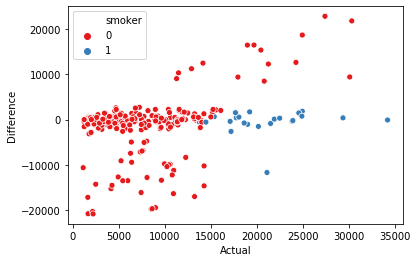

In [219]:
sns.scatterplot(x=myRealkn['Actual'],y=myReal2['Difference'],data=myRealkn, palette="Set1",hue='smoker')

#### From this plot, we can discuss that those who do smoke saw fewer difference in terms of charge than those who did not smoke. However, those who do not smoke, saw major changes to their prediction charges. We can see about 15 people were overcharged and about 30+ people were undercharged.

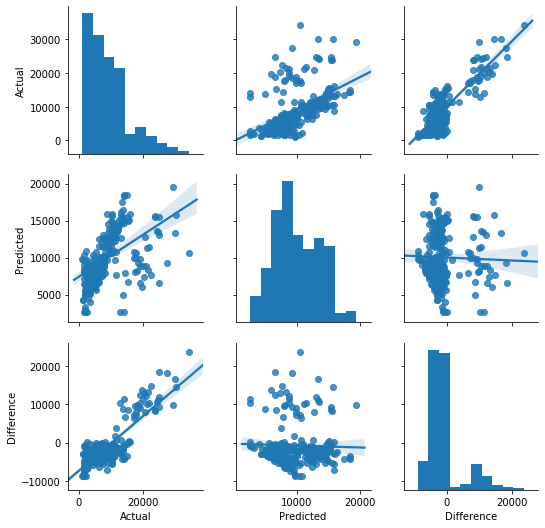

In [220]:
sns.pairplot(df5,kind='reg')

In [221]:
print(df.loc[[0]])
#age,bmi,smoker
kn5.predict([[19,27.9,0]])

   age  sex   bmi  children  smoker  region    charges
0   19    0  27.9         0       1       3  16884.924


array([9028.19972769])

In [222]:
df5.describe()

,Actual,Predicted,Difference
count,239.000000,239.000000,239.000000
mean,9254.477322,10021.975374,-767.498052
std,6504.876336,3561.043439,5557.002203
min,1131.506600,2618.337783,-8777.231740
25%,4248.935275,7498.147980,-3752.345884
50%,7749.156400,9571.160513,-2093.829411
75%,12159.774750,12887.866599,-800.991912
max,34166.273000,19492.597688,23603.413401


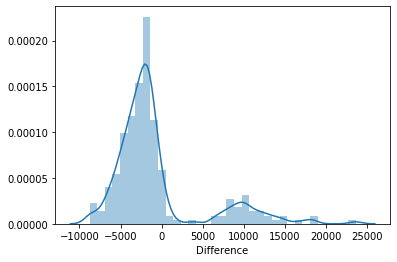

In [223]:
sns.distplot(df5['Difference'])

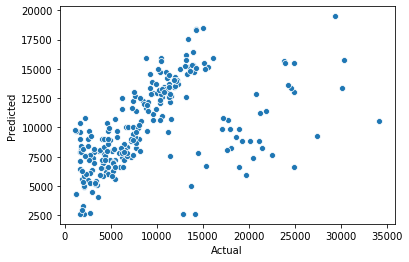

In [224]:
sns.scatterplot(x=df5['Actual'],y=df5['Predicted'],data=df5)

In [225]:
df6 = pd.DataFrame(df5['Predicted'])
df6['Actual'] = pd.DataFrame(df5['Actual'])
df6['Difference'] = pd.DataFrame(df5['Difference'])

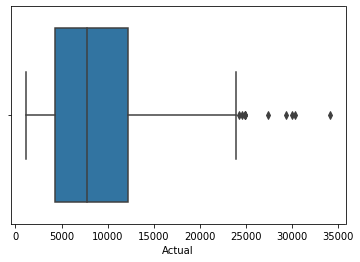

In [226]:
sns.boxplot(df6['Actual'])

In [227]:
df6['Actual'].describe()

count      239.000000
mean      9254.477322
std       6504.876336
min       1131.506600
25%       4248.935275
50%       7749.156400
75%      12159.774750
max      34166.273000
Name: Actual, dtype: float64

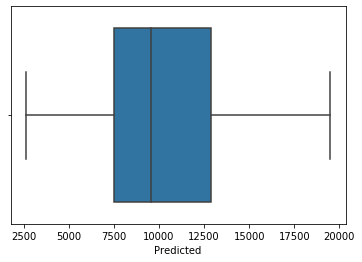

In [228]:
sns.boxplot(df6['Predicted'])

In [229]:
df6['Predicted'].describe()

count      239.000000
mean     10021.975374
std       3561.043439
min       2618.337783
25%       7498.147980
50%       9571.160513
75%      12887.866599
max      19492.597688
Name: Predicted, dtype: float64